# Sample Notebook - Model Interpretability - Linear Regression

**Abstract**

In this notebook we interpret the models based on the following tasks:

1. Fit a linear model and interpret the regression coefficients

2. Run SHAP analysis on the model and interpret the SHAP values 

# Context for the problem

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is

**Predictor variables:**

id - Unique identifier

battery_power - Total energy a battery can store in one time measured in mAh

blue - has bluetooth or not

clock_speed - speed at which microprocessor executes instructions

dual_sim - Has dual sim support or not

fc - Front Camera mega pixels

four_g - Has 4G or not

int_memory - Internal Memory in Gigabytes

m_dep - Mobile Depth in cm

mobile_wt - Weight of mobile phone in grams

n_cores - Number of cores of processor

pc - Primary Camera mega pixels

px_height - Pixel Resolution Height

px_width - Pixel Resolution Width

ram - Random Access Memory in Megabytes

sc_h - Screen Height of mobile in cm

sc_w - Screen Width of mobile in cm

talk_time - longest time that a single battery charge will last when you are

three_g - Has 3G or not

touch_screen - Has touch screen or not

wifi - Has wifi or not


**The target variable "Price" indicates as below:**

0 (low cost)

1 (medium cost)

2 (high cost)

3 (very high cost)

# Install Packages

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install shap
!pip install probatus==1.7.0


!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 9.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 KB 3.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 4.2 M

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split

# Import libraries
# Use pip install or conda install if missing a library
import warnings
warnings.filterwarnings('ignore')
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# MAE
from sklearn.metrics import mean_absolute_error

# SHAP
import shap
from sklearn.feature_extraction.text import TfidfVectorizer



# Load the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* The count shows that there are 2000 observations for each column, indicating 
that there are no missing values.

* The mean represents the average value of each column.
* The standard deviation (std) shows how much the values in each column vary from the mean.

* The min and max values are the smallest and largest values in each column, respectively.

* The 25%, 50%, and 75% quartiles represent the values below which 25%, 50%, and 75% of the values in each column fall, respectively.

* The range of the dataset can be seen by subtracting the min value from the max value.

For example, the mean battery power is 1238.5 units, with a standard deviation of 439.4. The minimum battery power is 501, and the maximum is 1998. The 25th percentile of battery power is 851.75, the 50th percentile (median) is 1226, and the 75th percentile is 1615.25. This indicates that most battery power values fall between 851.75 and 1615.25. The same information is provided for all other columns as well.

# Checking Data and Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

As there are no null or missing values present, we can proceed to model training.

# Training model on data set


## 1. LogisticRegression





# Preprating Test and Train Data

Taking all the predictor variables in dataframe X and target variable on dataframe y. Here, we aere using a standard split of 80,20 to split the training and test datasets

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pratikg17neu/DS_6105__Assignment1/proper-dataset/dataset/train.csv')

X = df.drop("price_range", axis = 1)
y = df["price_range"]

# Create the X_train and y_train
X_train = df.drop("price_range", axis = 1)
y_train = df["price_range"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape, X_test.shape

np.random.seed(42);

## 1.Performing Logistic Regression

LogisticRegression is a classification algorithm used for binary and multi-class classification problems. The solver parameter specifies the algorithm to use in the optimization problem of the logistic regression model.

Here, solver='liblinear' means that the liblinear library is used as the optimization algorithm to fit the logistic regression model. This is a good choice for small datasets and binary classification problems. It can handle both L1 and L2 regularization, which can help prevent overfitting.

In [ ]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.7575

Logistics Regression Model has accuracy of `76.75%`

A logistic regression model with an accuracy of 76.75% means that the model was able to correctly classify 76.75% of the samples in the dataset. This means that out of all the samples in the dataset, the model was able to predict the correct class label for 76.75% of them.

#### Mean Aboslute Error for Logistic Regression

In [ ]:
y_preds = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.2425

Mean Absolute Error (MAE) is a metric used to evaluate the performance of a regression model. It measures the average absolute difference between the actual and predicted values.

The reported value of MAE (0.2425) is actually the mean absolute error of the predicted probabilities from the true class labels. In this case, a lower value of MAE indicates better performance, as it means the predicted probabilities are closer to the true class labels on average.

## 1.2 SHAP Value on Logistic Regression

### Using Linear Explainer

This code generates a summary plot of SHAP (SHapley Additive exPlanations) values for a logistic regression model.

shap.LinearExplainer is used to create an explainer object for the trained logistic regression model (lr_model) using the test data (X_test). The explainer object helps to explain the model's predictions by computing the SHAP values for each feature.

explainer.shap_values is used to calculate the SHAP values for the test data X_test using the explainer object generated above.

Finally, shap.summary_plot is used to create the summary plot of the SHAP values for each feature in the test data. The plot shows the features in descending order of importance (based on the mean absolute SHAP value), along with their corresponding SHAP values for both the positive and negative classes. It helps to understand which features are most important for the model's predictions and how they contribute to the output.

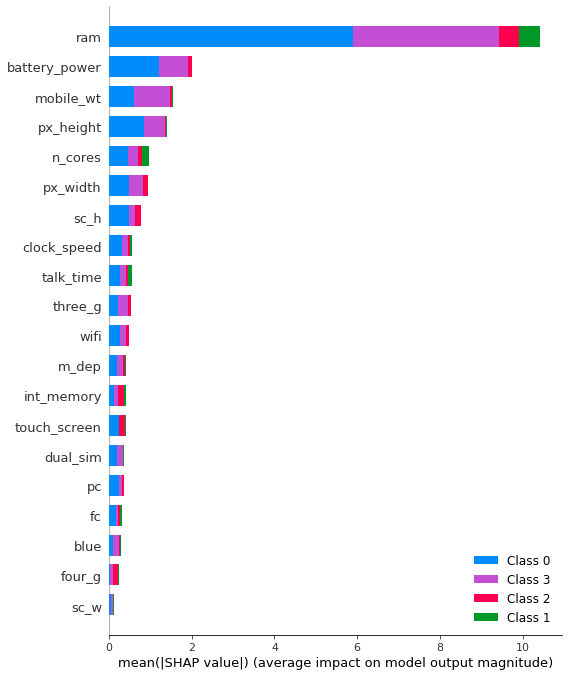

In [ ]:
explainer = shap.LinearExplainer(lr_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## We can see that the are 4 major variable which affect the pricing of the phone


1.   RAM
2.   Battery Power
3.   Pixel Height
4.   Weight of the phone




## Shap plot for Phone which is classified in 0 range (Lowest Price)

In [ ]:
# y_test contain result of mobile class
y_test.iloc[1]

# y_test

0

In [ ]:
ex = shap.KernelExplainer(lr_model.predict, X_test)
shap.initjs()

# Plotting for Mobile phone in 0 price range
shap_values = ex.shap_values(X_test.iloc[1,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[1,:])


The above force plot shows a summary of the impact of each feature on the model's output. The horizontal axis represents the feature's SHAP value, which is a measure of its contribution to the model's output for the given observation. Features that push the model's output towards a higher value are shown in red, while those that push the output towards a lower value are shown in blue. The length of each bar represents the magnitude of the feature's impact on the model's output.


Here, we can see that as the column contains data regarding the lowest price phone the due to the less ram size the price is lower. Battery power feature is pushing the price higher in a low cost model.

## Shap plot for Phone which is classified in 2 range (Medium Price)

In [ ]:
# y_test contain result of mobile class
y_test.iloc[0]

0

In [ ]:
# Plotting for Mobile phone in 2 price range
shap.initjs()
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

We observe almost same feature affecting the price as the low cost model. From the SHAP plot we can see that that `ram` feature is determining the price of phone and battery power is pushing the price higher in a medium cost model.

## Shap plot for Phone which is classified in 3 range (Highest Price)

In [ ]:
# y_test contain result of mobile class
y_test.iloc[3]

2

In [ ]:
# Plotting for Mobile phone in 2 price range
shap.initjs()
shap_values = ex.shap_values(X_test.iloc[3,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[3,:])

Here we can see the difference for phone with more ram memory, battery, pixel height and weight is affects the price of the phone. The features in red impacts the output and pushes the price of the phone on the higher side on the other hand the variable in blue pulls the phone pricing down.

## Summary Plot for the first 100 test dataset

The above code uses the SHAP library to generate summary plots for the first 100 instances of the test set (X_test[:100]) using the previously created linear explainer (ex). Specifically, it computes the SHAP values for these instances and generates a summary plot to visualize the impact of each feature on the model's output for these instances.

Each row in the plot corresponds to a feature, with the features ordered from most to least important based on their impact on the model's output. The color of the feature indicates the value of the feature for the corresponding instance, with red indicating a high value and blue indicating a low value. The location of the dot on the x-axis indicates the impact of the feature on the model's output, with positive values indicating that the feature increases the model's output and negative values indicating that the feature decreases the model's output.





  0%|          | 0/100 [00:00<?, ?it/s]

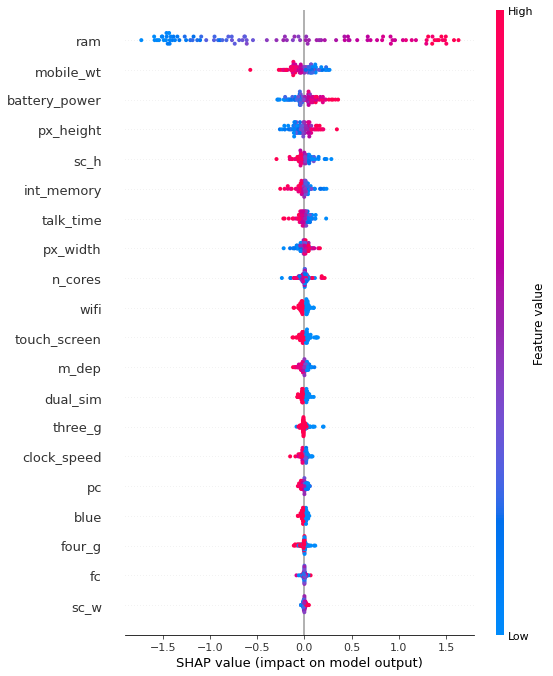

In [ ]:
shap_values = ex.shap_values(X_test[:100])
shap.summary_plot(shap_values, X_test[:100])

Again from the summary plot we can deduce that the all the top four feature influence the output. Higher ram, Higher battery power, lower mobile weight, high pixel height influence the price of the device.

For example, looking at the first row of the plot (which corresponds to the feature ram), we can see that a high value of this feature (indicated by the red color) is associated with a higher predicted price range (as indicated by the positive impact on the model's output). Similarly, looking at the second row of the plot (which corresponds to the feature mobile_wt), we can see that a high value of this feature is also associated with a lower predicted price range.

## Force plot for the dataset

In [ ]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)


Positive shap values are indicated in red, whereas negative shap values are shown in blue. For example, because the first record had more red contributions than blue contributions, the forecast for this record would be greater than the expected value.We can modify both axes thanks to the interactivity. In the image above, for example, the y-axis displays forecasts, f(x), while the x-axis is ordered by the output (prediction) value.

**Conclusion**

From the above analysis we can conclude the following features as the most important to sell a mobile phone.

RAM

Battery Power

Pixel Height

Weight of the phone

MIT License

 

Copyright (c) 2023 AI Skunkworks

 

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

 

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

## Reference

- https://shap.readthedocs.io/en/latest/tabular_examples.html
- https://github.com/aiprobably/SHAP
- https://www.youtube.com/watch?v=m60swo-th4E
- https://medium.com/dataman-in-ai/the-shap-values-with-h2o-models-773a203b75e3